<a href="https://colab.research.google.com/github/Kamui964/CODSOFT/blob/master/Iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [3]:
df=pd.read_csv('/content/IRIS[1].csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
df["species"].replace({"Iris-setosa":0 , "Iris-versicolor":1 , "Iris-virginica":2} , inplace = True)
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [11]:
df['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

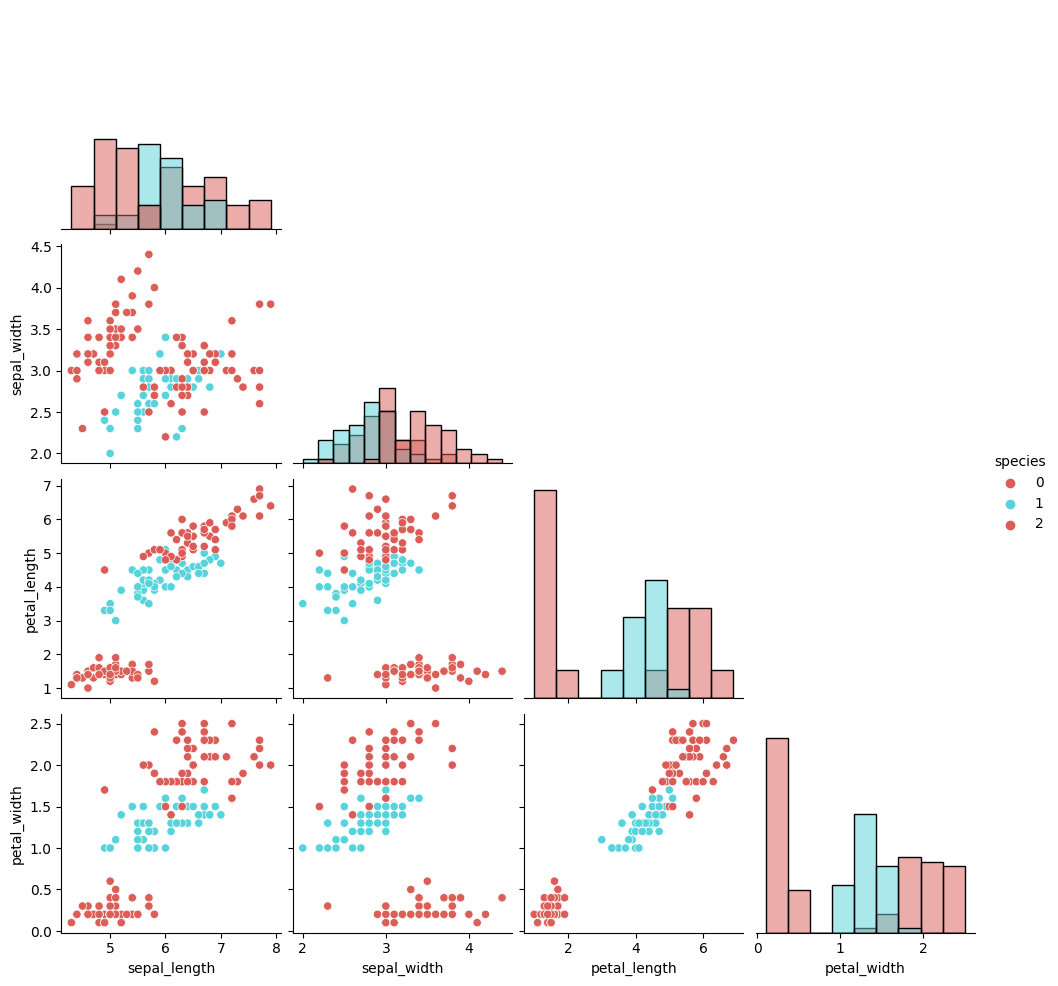

In [13]:
sns.pairplot(df , hue='species' , diag_kind="hist" , corner=True , palette = 'hls')


<Axes: >

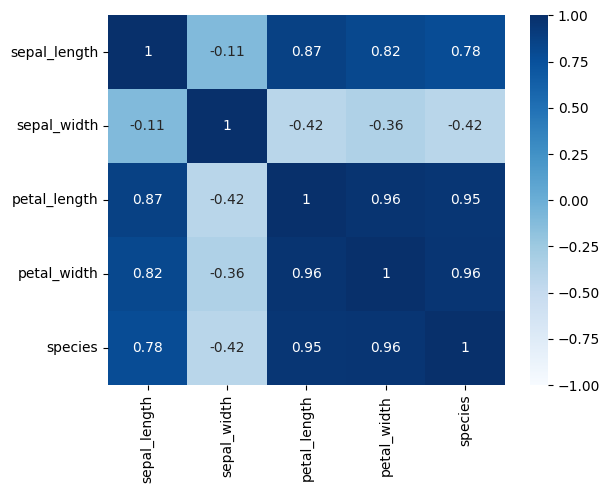

In [14]:
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True,cmap='Blues')

In [15]:
X=df.drop(['species'],axis=1)
y=df['species']

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [17]:
s=StandardScaler()
X_train_s=s.fit_transform(X_train)
X_test_s=s.transform(X_test)

In [23]:
model=SVC()
model.fit(X_train_s,y_train)
y_pred=model.predict(X_test_s)
y_pred

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2])

In [79]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9666666666666667

In [24]:
import tensorflow as tf
from tensorflow import keras

In [68]:
model2=keras.Sequential([
    keras.layers.Dense(64,input_shape=(4,),activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(3,activation='softmax')
])

In [69]:
model2.compile(
    optimizer=tf.keras.optimizers.Adam(0.01),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [70]:
r=model2.fit(X_train_s,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
3/3 [==============================] - 1s 101ms/step - loss: 0.7942 - accuracy: 0.6458 - val_loss: 0.3755 - val_accuracy: 0.7917
Epoch 2/25
3/3 [==============================] - 0s 28ms/step - loss: 0.4028 - accuracy: 0.8021 - val_loss: 0.2501 - val_accuracy: 0.8333
Epoch 3/25
3/3 [==============================] - 0s 31ms/step - loss: 0.2829 - accuracy: 0.8854 - val_loss: 0.1769 - val_accuracy: 0.9583
Epoch 4/25
3/3 [==============================] - 0s 33ms/step - loss: 0.2514 - accuracy: 0.8750 - val_loss: 0.1455 - val_accuracy: 0.9583
Epoch 5/25
3/3 [==============================] - 0s 29ms/step - loss: 0.2318 - accuracy: 0.9167 - val_loss: 0.1121 - val_accuracy: 1.0000
Epoch 6/25
3/3 [==============================] - 0s 21ms/step - loss: 0.1760 - accuracy: 0.9375 - val_loss: 0.1176 - val_accuracy: 0.9583
Epoch 7/25
3/3 [==============================] - 0s 18ms/step - loss: 0.1596 - accuracy: 0.9479 - val_loss: 0.0789 - val_accuracy: 0.9583
Epoch 8/25
3/3 [==========

In [74]:
model2.evaluate(X_test_s,y_test)

1/1 [==============================] - 0s 31ms/step - loss: 0.0824 - accuracy: 0.9667


[0.08236557990312576, 0.9666666388511658]

In [75]:
y_pred2=model.predict(X_test_s)

In [82]:
accuracy2=accuracy_score(y_test,y_pred2)
accuracy2

0.9666666666666667

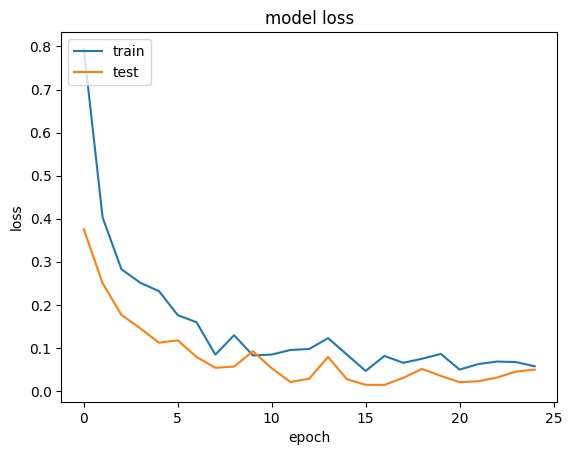

In [83]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

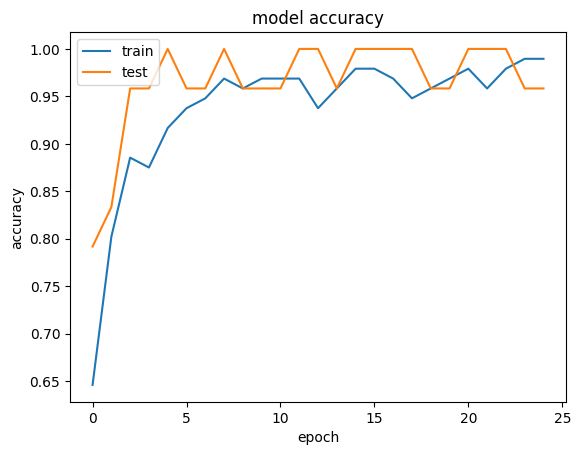

In [84]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()